In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #; sns set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [25]:
dataForImputation = pd.read_pickle('dataForImputation.pandas')
dataForImputation.head()

,id,date_sent,powerBack,isMissing,month,workDayMF,workDayS
0,1024.0,2016-11-22 22:00:00,False,False,11.0,False,False
1,1024.0,2016-11-22 23:00:00,False,False,11.0,False,False
2,1024.0,2016-11-23 00:00:00,False,False,11.0,False,False
3,1024.0,2016-11-23 01:00:00,False,False,11.0,False,False
4,1024.0,2016-11-23 02:00:00,False,False,11.0,False,False


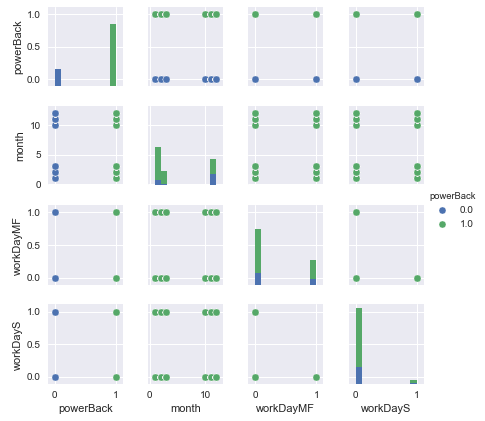

In [8]:
sns.pairplot(dataForImputation[['powerBack', 'month', 'workDayMF', 'workDayS']][dataForImputation['isMissing'] == False], hue='powerBack', size=1.5);

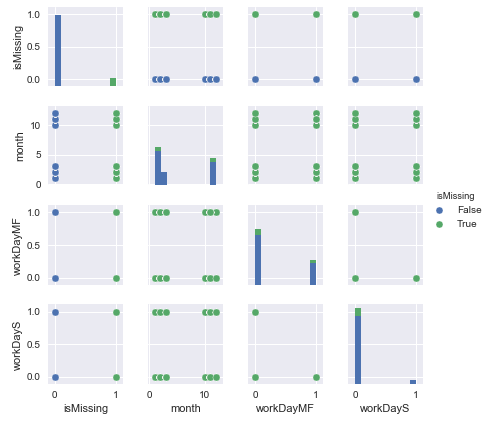

In [9]:
sns.pairplot(dataForImputation[['isMissing', 'month', 'workDayMF', 'workDayS']], hue='isMissing', size=1.5);

In [26]:
print(dataForImputation['month'].value_counts())
months = pd.get_dummies(dataForImputation['month'])
id = pd.get_dummies(dataForImputation['id'])
dataForImputation = pd.concat([dataForImputation, 
                               pd.concat([months, id], axis=1)], axis=1)

1.0     184183
12.0    166384
2.0     158156
3.0     119134
11.0     71963
10.0      3558
Name: month, dtype: int64


In [27]:
dataForImputation.head()

,id,date_sent,powerBack,isMissing,month,workDayMF,workDayS,1.0,2.0,3.0,...,1292.0,1293.0,1294.0,1295.0,1296.0,1297.0,1298.0,1299.0,1300.0,1301.0
0,1024.0,2016-11-22 22:00:00,False,False,11.0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1024.0,2016-11-22 23:00:00,False,False,11.0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1024.0,2016-11-23 00:00:00,False,False,11.0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1024.0,2016-11-23 01:00:00,False,False,11.0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1024.0,2016-11-23 02:00:00,False,False,11.0,False,False,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
dataForImputation['powerBack'] = dataForImputation['powerBack'].astype('bool')
dataTrainTest = dataForImputation[dataForImputation['isMissing'] == False]
dataImpute = dataForImputation[dataForImputation['isMissing'] == True]

In [35]:
model = LogisticRegression(fit_intercept=True)

In [36]:
rng = np.random.RandomState(42)
X = dataTrainTest.drop(['id', 'date_sent', 'powerBack', 'isMissing', 'month'], axis=1)
y = dataTrainTest['powerBack']
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, random_state=rng, train_size=0.8)

In [37]:
fit = model.fit(Xtrain, yTrain)

In [39]:
from sklearn.model_selection import cross_val_score
modelCVscore = cross_val_score(model, Xtrain, yTrain, cv=10)

In [40]:
modelCVscore.mean()

0.81151035560031759

In [46]:
yPred = model.predict(Xtest)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy: ', accuracy_score(yTest, yPred))
print('Precision: ', precision_score(yTest, yPred))
print('Recall: ', recall_score(yTest, yPred))

Accuracy:  0.811370734986
Precision:  0.847922209493
Recall:  0.919946994289


In [51]:
from sklearn.externals import joblib
joblib.dump(model, 'modelLogistic.pkl') 

['modelLogistic.pkl']

In [53]:
denom = dataForImputation.shape[0]
num = dataImpute.shape[0]
num/denom

0.10101965088473054

In [20]:
from sklearn.neighbors import KNeighborsClassifier
modelK = KNeighborsClassifier(n_neighbors=10)
modelKCVscore = cross_val_score(modelK, Xtrain, yTrain, cv=10)
#from sklearn.metrics import accuracy_score
#accuracy_score(y, y_model)

In [21]:
modelKCVscore.mean()

0.81601219649837342

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(5) + 1}
gridK = GridSearchCV(modelK, param_grid, cv=10)

In [ ]:
gridK.fit(Xtrain, yTrain)

In [ ]:
from sklearn.externals import joblib
joblib.dump(gridK, 'gridK.pkl') 
#joblib.dump(modelKCVscore, 'modelKCVscore.pkl') 

# clf = joblib.load('filename.pkl') 

In [ ]:
print(grid.best_params_)
modelKgrid = grid.best_estimator_
yPred = modelKgrid.fit(Xtrain, yTrain).predict(Xtest)
accuracy_score(yTest, yPred)

In [ ]:
2+2

In [ ]:
gridK.to_pickle('gridK.fitted')

In [ ]:
modelKCVscore.to_picle('modelKCVscore.fitted')

In [ ]:
joblib.dump(modelK, 'modelK.pkl') 

In [ ]:
joblib.dump(modelKgrid, 'modelKgrid.pkl') 